In [1]:
import numpy as np 
from scipy import special
import tensorflow as tf
import tensorflow_probability as tfp
import edward2 as ed
tfd = tfp.distributions
tfb = tfp.bijectors

In [2]:
from diffhod import components as DHOD

In [3]:
# -- plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [4]:
def Zheng07Cens(Mhalo, logMmin=11.35, sigma_logM=0.25):
    Ncen = 0.5 * (1. + special.erf((np.log10(Mhalo) - logMmin)/sigma_logM)) 
    return Ncen 

def Zheng07Sats(Mhalo, Ncen, logM0=11.2, logM1=12.4, alpha=0.83): 
    ''' expected Nsat at Mh
    '''
    Nsat = Ncen * ((Mhalo - 10**logM0)/10**logM1)**alpha
    Nsat[~np.isfinite(Nsat)] = 0. 
    return Nsat 

In [5]:
Mhalo = 10**np.linspace(10, 15, 100)

(100000000000, 10000000000000)

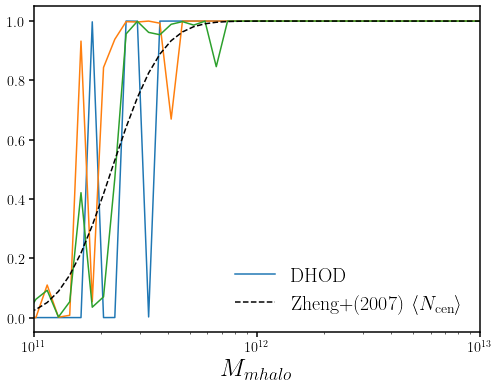

In [7]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
for i, temp in enumerate([0.1, 0.4, 0.8]):
    if i == 0: lbl = 'DHOD'
    else: lbl = None
    sub.plot(Mhalo, DHOD.Zheng07Cens(tf.convert_to_tensor(Mhalo, dtype=tf.float32), temperature=temp).value[0],
             label=lbl)
    
sub.plot(Mhalo, Zheng07Cens(Mhalo), c='k', ls='--', label=r'Zheng+(2007) $\langle N_{\rm cen}\rangle$')
sub.legend(loc='lower right', fontsize=20)
sub.set_xlabel('$M_{\rm halo}$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(10**11, 10**13)

<ipython-input-4-7f08d13bdabc>:8: RuntimeWarning: invalid value encountered in power
  Nsat = Ncen * ((Mhalo - 10**logM0)/10**logM1)**alpha


(0.1, 100.0)

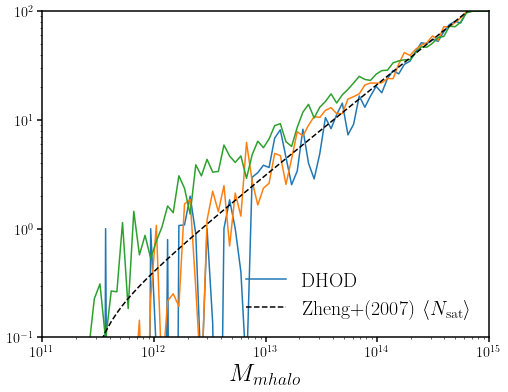

In [9]:
fig = plt.figure(figsize=(8,6))
sub = fig.add_subplot(111)
for i, temp in enumerate([0.1, 0.4, 0.8]): 
    _Ncen = DHOD.Zheng07Cens(tf.convert_to_tensor(Mhalo, dtype=tf.float32), temperature=temp)
    _Nsat = DHOD.Zheng07SatsRelaxedBernoulli(tf.convert_to_tensor(Mhalo, dtype=tf.float32), _Ncen, temperature=temp)
    if i == 0: lbl = 'DHOD'
    else: lbl = None
    sub.plot(Mhalo, np.sum(_Nsat.value, axis=0)[0], label=lbl)
sub.plot(Mhalo, Zheng07Sats(Mhalo, Zheng07Cens(Mhalo)), c='k', ls='--', label=r'Zheng+(2007) $\langle N_{\rm sat}\rangle$')
sub.legend(loc='lower right', fontsize=20)
sub.set_xlabel('$M_{\rm halo}$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(10**11, 10**15)
sub.set_yscale('log')
sub.set_ylim(1e-1, 1e2)